## Movies

Selected queries :
1. NO FILTER -> NUMBER OF REVIEWS PER YEAR (BAR PLOT)
2. FILTER BY YEAR -> TOP 10 JOURNALIST MOST PROLIFIC (BAR PLOT)
3. FILTER BY JOURNALIST -> NUMBER OF REVIEWS PER YEAR FOR EACH (BAR PLOT)
4. NO FILTER - > TOP 5 MPAA CATEGORY ALL TIME (BAR PLOT)
5. FILTER BY YEAR -> PROPORTION OF MOVIES BY MPAA CATEGORY (PIE PLOT)
6. NO FILTER -> NUMBER OF MOVIES PICK PER YEAR (BAR PLOT)

1. NO FILTER -> NUMBER OF REVIEWS PER YEAR

/var/folders/0l/46n5zz7920jg0lld8ddcxvv40000gn/T/ipykernel_12896/1298817628.py:22: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="movies", body=query_body)


,key_as_string,key,doc_count
88,2014,1388534400000,871
89,2015,1420070400000,776
90,2016,1451606400000,774
91,2017,1483228800000,741
92,2018,1514764800000,690
93,2019,1546300800000,696
94,2020,1577836800000,655
95,2021,1609459200000,769
96,2022,1640995200000,766
97,2023,1672531200000,370


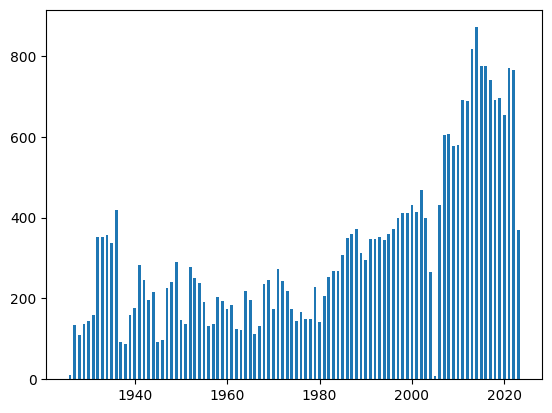

In [141]:
import json
import pandas as pd
import matplotlib.pyplot as plt

from elasticsearch import Elasticsearch
es = Elasticsearch(hosts = "http://@localhost:9200")

#Number of reviews per year

query_body = {
"size": 0,
"aggs": {
    "reviews_by_year": {
    "date_histogram": {
        "field": "publication_date",
        "calendar_interval": "year",
        "format": "yyyy"
    }
    }
}
}
result = es.search(index="movies", body=query_body)

result = json.dumps(result["aggregations"]["reviews_by_year"]["buckets"])

df = pd.read_json(result)
display(df.tail(10))

plt.bar(df["key_as_string"], df["doc_count"], width = 0.6)
plt.show()


2. FILTER BY YEAR -> TOP 10 JOURNALIST MOST PROLIFIC

/var/folders/0l/46n5zz7920jg0lld8ddcxvv40000gn/T/ipykernel_12896/741428020.py:28: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="movies", body=query_body)


,key,doc_count
0,Glenn Kenny,129
1,Ben Kenigsberg,119
2,Jeannette Catsoulis,99
3,Manohla Dargis,49
4,Teo Bugbee,40
5,A.O. Scott,33
6,Devika Girish,32
7,Kristen Yoonsoo Kim,26
8,Natalia Winkelman,25
9,Lovia Gyarkye,21


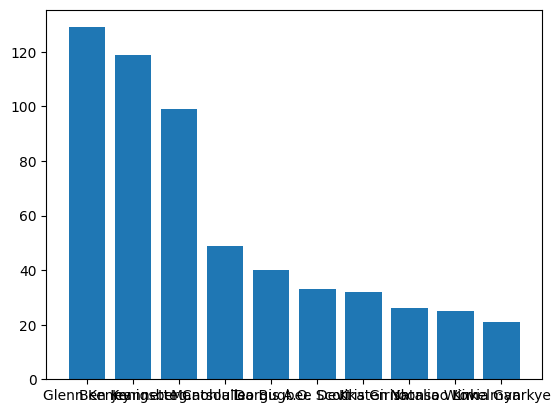

In [157]:
import json
import pandas as pd
import matplotlib.pyplot as plt

from elasticsearch import Elasticsearch
es = Elasticsearch(hosts = "http://@localhost:9200")

#Number of reviews by journalist

def get_reviews_per_journalist (year):

    query_body = {
        "size": 0,
        "query": {
            "bool": {
                "filter": [
                    {"range": {"publication_date": {"gte": f"{year}-01-01", "lte": f"{year}-12-31"}}}
                ]
            }
        },
        "aggs": {
            "top_journalists": {
                "terms": {"field": "byline.keyword", "size": 10}
            }
        }
    }

    result = es.search(index="movies", body=query_body)

    result = json.dumps(result["aggregations"]["top_journalists"]["buckets"])

    df = pd.read_json(result)
    display(df.head(10))

    plt.bar(df["key"], df["doc_count"])
    plt.show()


get_reviews_per_journalist(year=2020)

3. FILTER BY JOURNALIST -> NUMBER OF REVIEWS PER YEAR FOR EACH

/var/folders/0l/46n5zz7920jg0lld8ddcxvv40000gn/T/ipykernel_12896/2091526096.py:31: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="movies", body=query_body)


,key_as_string,key,doc_count
0,2006,1136073600000,23
1,2007,1167609600000,17
2,2008,1199145600000,17
3,2009,1230768000000,26
4,2010,1262304000000,29
5,2011,1293840000000,51
6,2012,1325376000000,52
7,2013,1356998400000,69
8,2014,1388534400000,56
9,2015,1420070400000,79


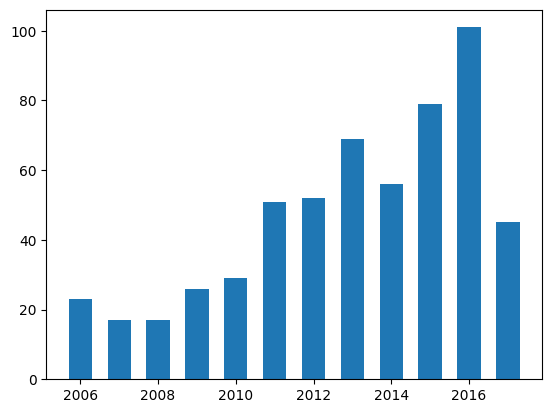

In [144]:
import json
import pandas as pd
import matplotlib.pyplot as plt

from elasticsearch import Elasticsearch
es = Elasticsearch(hosts = "http://@localhost:9200")

#Number of reviews per year

def get_reviews_per_year (journalist: str):

    query_body = {
    "size":0,
    "query": {
                "bool": {
                    "filter": [
                        {"term": {"byline.keyword": f"{journalist}"}}
                    ]
                }
            },
    "aggs": {
        "reviews_by_year": {
        "date_histogram": {
            "field": "publication_date",
            "calendar_interval": "year",
            "format": "yyyy"
        }
        }
    }
    }
    result = es.search(index="movies", body=query_body)

    result = json.dumps(result["aggregations"]["reviews_by_year"]["buckets"])

    df = pd.read_json(result)
    display(df.head(10))

    plt.bar(df["key_as_string"], df["doc_count"], width = 0.6)
    plt.show()

get_reviews_per_year(journalist="NEIL GENZLINGER")

4. NO FILTER - > TOP 5 MPAA CATEGORY ALL TIME

/var/folders/0l/46n5zz7920jg0lld8ddcxvv40000gn/T/ipykernel_12896/3649101483.py:21: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="movies", body=query_body)


,key,doc_count
0,,11393
1,R,7023
2,PG-13,3005
3,Approved,2604
4,PG,2488


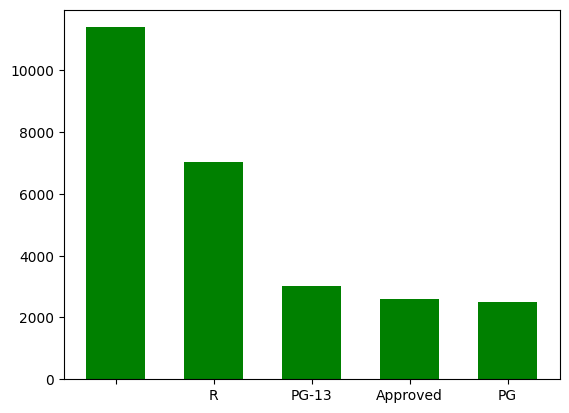

In [154]:
import json
import pandas as pd
import matplotlib.pyplot as plt

from elasticsearch import Elasticsearch
es = Elasticsearch(hosts = "http://@localhost:9200")

#Number of movies per MPAA category

query_body = {
"size": 0,
"aggs": {
    "films_by_mpaa_rating": {
    "terms": {
        "field": "mpaa_rating",
        "size": 5
    }
    }
}
}
result = es.search(index="movies", body=query_body)

result = json.dumps(result["aggregations"]["films_by_mpaa_rating"]["buckets"])

df = pd.read_json(result)
display(df.head(10))

plt.bar(df["key"], df["doc_count"], color = 'green', width = 0.6)
plt.show()

5. FILTER BY YEAR -> PROPORTION OF MOVIES BY MPAA CATEGORY

/var/folders/0l/46n5zz7920jg0lld8ddcxvv40000gn/T/ipykernel_12896/3690278959.py:30: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="movies", body=query_body)


,key,doc_count
0,,377
1,R,213
2,PG-13,103
3,PG,41
4,Unrated,19
5,Not Rated,14
6,G,4
7,Approved,1
8,TV-MA,1
9,X,1


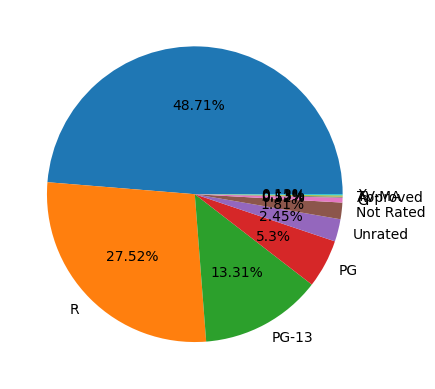

In [155]:
import json
import pandas as pd
import matplotlib.pyplot as plt

from elasticsearch import Elasticsearch
es = Elasticsearch(hosts = "http://@localhost:9200")

#Number of movies per MPAA category

def get_reviews_per_mpaa (year):

    query_body = {
    "size": 0,
            "query": {
                "bool": {
                    "filter": [
                        {"range": {"publication_date": {"gte": f"{year}-01-01", "lte": f"{year}-12-31"}}}
                    ]
                }
            },
    "aggs": {
        "films_by_mpaa_rating": {
        "terms": {
            "field": "mpaa_rating",
            "size": 10
        }
        }
    }
    }
    result = es.search(index="movies", body=query_body)

    result = json.dumps(result["aggregations"]["films_by_mpaa_rating"]["buckets"])

    df = pd.read_json(result)
    display(df.head(10))

    plt.pie(df["doc_count"], labels = df["key"], autopct = lambda x: str(round(x, 2)) + '%')
    plt.show()

get_reviews_per_mpaa(year=2016)

6. NO FILTER -> NUMBER OF MOVIES PICK PER YEAR

/var/folders/0l/46n5zz7920jg0lld8ddcxvv40000gn/T/ipykernel_12896/457881575.py:35: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="movies", body=query_body)


,key_as_string,key,doc_count,total_selected_movies
87,2014,1388534400000,157,{'value': 157.0}
88,2015,1420070400000,182,{'value': 182.0}
89,2016,1451606400000,228,{'value': 228.0}
90,2017,1483228800000,164,{'value': 164.0}
91,2018,1514764800000,205,{'value': 205.0}
92,2019,1546300800000,170,{'value': 170.0}
93,2020,1577836800000,139,{'value': 139.0}
94,2021,1609459200000,169,{'value': 169.0}
95,2022,1640995200000,165,{'value': 165.0}
96,2023,1672531200000,79,{'value': 79.0}


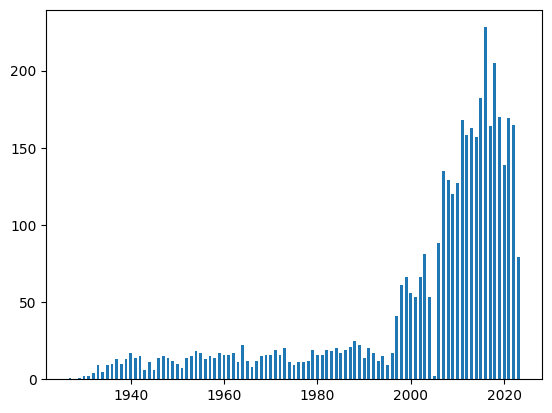

In [140]:
import json
import pandas as pd
import matplotlib.pyplot as plt

from elasticsearch import Elasticsearch
es = Elasticsearch(hosts = "http://@localhost:9200")

query_body = {
        "size": 0,
        "query": {
            "bool": {
                "filter": {
                            "term": {
                                "critics_pick": 1
            }}}
        },
        "aggs": {
            "movies_by_year": {
                "date_histogram": {
                    "field": "publication_date",
                    "calendar_interval": "year",
                    "format": "yyyy"
                },
                "aggs": {
                    "total_selected_movies": {
                        "sum": {
                            "field": "critics_pick"
                        }
                    }
                }
            }
        }
    }

result = es.search(index="movies", body=query_body)

result = json.dumps(result["aggregations"]["movies_by_year"]["buckets"])

df = pd.read_json(result)
display(df.tail(10))

plt.bar(df["key_as_string"], df["doc_count"], width = 0.6)
plt.show()


## Autres requêtes
- Total number of reviewed movies
- Total number of reviews
- Total number of journalists
- Number of reviews by journalist
- Number of reviews per year
- Number of reviews by journalist and per year
- Number of MPAA categories
- Number of films per MPAA category

In [146]:
from elasticsearch import Elasticsearch
import pandas as pd
es = Elasticsearch(hosts = "http://@localhost:9200")

#Total number of reviewed movies

query_body = {
  "size": 0,
  "aggs": {
    "total_movies": {
      "cardinality": {
        "field": "display_title.keyword"
      }
    }
  }
}
result = es.search(index="movies", body=query_body)
result.body

#Dataframe

total_movies = result["aggregations"]["total_movies"]["value"]

data = {"Nb of reviewed movies" : [total_movies]}

df = pd.DataFrame(data)

print(df)

   Nb of reviewed movies
0                  29396


/var/folders/0l/46n5zz7920jg0lld8ddcxvv40000gn/T/ipykernel_12896/1416541232.py:17: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="movies", body=query_body)


In [147]:
from elasticsearch import Elasticsearch
es = Elasticsearch(hosts = "http://@localhost:9200")

#Total number of reviews

query_body = {
  "size": 0,
  "aggs": {
    "total_reviews": {
      "cardinality": {
        "field": "headline.keyword"
      }
    }
  }
}
result = es.search(index="movies", body=query_body)
result.body

/var/folders/0l/46n5zz7920jg0lld8ddcxvv40000gn/T/ipykernel_12896/1967684515.py:16: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="movies", body=query_body)


{'took': 24,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 10000, 'relation': 'gte'},
  'max_score': None,
  'hits': []},
 'aggregations': {'total_reviews': {'value': 30808}}}

In [148]:
from elasticsearch import Elasticsearch
es = Elasticsearch(hosts = "http://@localhost:9200")

#Total number of journalists

query_body = {
  "size": 0,
  "aggs": {
    "total_journalists": {
      "cardinality": {
        "field": "byline.keyword"
      }
    }
  }
}
result = es.search(index="movies", body=query_body)
result.body

/var/folders/0l/46n5zz7920jg0lld8ddcxvv40000gn/T/ipykernel_12896/2329979850.py:16: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="movies", body=query_body)


{'took': 12,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 10000, 'relation': 'gte'},
  'max_score': None,
  'hits': []},
 'aggregations': {'total_journalists': {'value': 532}}}

In [149]:
from elasticsearch import Elasticsearch
import pandas as pd
es = Elasticsearch(hosts = "http://@localhost:9200")

#Number of reviews by journalist

query_body = {
  "size": 0,
  "aggs": {
    "reviews_per_journalist": {
      "terms": {
        "field": "byline.keyword",
        "size": 20
      }
    }
  }
}
result = es.search(index="movies", body=query_body)
result.body

# #Dataframe

# elements = result["aggregations"]["reviews_per_journalist"]["buckets"]

# data = {"Journalist" : [], "Number of reviews" : []}

# for element in elements :
#     data["Journalist"].append(element["key"])
#     data["Number of reviews"].append(element["doc_count"])

# df = pd.DataFrame(data)

# print(df)

/var/folders/0l/46n5zz7920jg0lld8ddcxvv40000gn/T/ipykernel_12896/3390011693.py:18: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="movies", body=query_body)


{'took': 1,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 10000, 'relation': 'gte'},
  'max_score': None,
  'hits': []},
 'aggregations': {'reviews_per_journalist': {'doc_count_error_upper_bound': 182,
   'sum_other_doc_count': 10891,
   'buckets': [{'key': 'BOSLEY CROWTHER', 'doc_count': 2966},
    {'key': 'Janet Maslin', 'doc_count': 1816},
    {'key': 'STEPHEN HOLDEN', 'doc_count': 1582},
    {'key': 'VINCENT CANBY', 'doc_count': 1572},
    {'key': 'JEANNETTE CATSOULIS', 'doc_count': 1443},
    {'key': 'Stephen Holden', 'doc_count': 1301},
    {'key': 'MANOHLA DARGIS', 'doc_count': 1285},
    {'key': 'A. O. SCOTT', 'doc_count': 1224},
    {'key': 'Vincent Canby', 'doc_count': 1018},
    {'key': 'MORDAUNT HALL.', 'doc_count': 971},
    {'key': 'JANET MASLIN', 'doc_count': 852},
    {'key': 'NEIL GENZLINGER', 'doc_count': 565},
    {'key': 'BEN KENIGSBERG', 'doc_count': 542},
    {'key': 'A. O. Scott', 'doc_coun

In [150]:
from elasticsearch import Elasticsearch
es = Elasticsearch(hosts = "http://@localhost:9200")

#Number of MPAA categories

query_body = {
  "size": 0,
  "aggs": {
    "total_films": {
      "cardinality": {
        "field": "mpaa_rating"
      }
    }
  }
}
result = es.search(index="movies", body=query_body)
result.body

/var/folders/0l/46n5zz7920jg0lld8ddcxvv40000gn/T/ipykernel_12896/4054417190.py:16: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="movies", body=query_body)


{'took': 5,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 10000, 'relation': 'gte'},
  'max_score': None,
  'hits': []},
 'aggregations': {'total_films': {'value': 21}}}

In [151]:
from elasticsearch import Elasticsearch
es = Elasticsearch(hosts = "http://@localhost:9200")

#Number of movies per MPAA category

query_body = {
  "size": 0,
  "aggs": {
    "films_by_mpaa_rating": {
      "terms": {
        "field": "mpaa_rating",
        "size": 10
      }
    }
  }
}
result = es.search(index="movies", body=query_body)
result.body

/var/folders/0l/46n5zz7920jg0lld8ddcxvv40000gn/T/ipykernel_12896/4155455540.py:17: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="movies", body=query_body)


{'took': 1,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 10000, 'relation': 'gte'},
  'max_score': None,
  'hits': []},
 'aggregations': {'films_by_mpaa_rating': {'doc_count_error_upper_bound': 0,
   'sum_other_doc_count': 572,
   'buckets': [{'key': '', 'doc_count': 11393},
    {'key': 'R', 'doc_count': 7023},
    {'key': 'PG-13', 'doc_count': 3005},
    {'key': 'Approved', 'doc_count': 2604},
    {'key': 'PG', 'doc_count': 2488},
    {'key': 'Not Rated', 'doc_count': 1486},
    {'key': 'Unrated', 'doc_count': 934},
    {'key': 'Passed', 'doc_count': 907},
    {'key': 'G', 'doc_count': 492},
    {'key': 'TV-MA', 'doc_count': 142}]}}}

In [152]:
from elasticsearch import Elasticsearch
es = Elasticsearch(hosts = "http://@localhost:9200")

#Number of reviews per year

query_body = {
  "size": 0,
  "aggs": {
    "reviews_by_year": {
      "date_histogram": {
        "field": "publication_date",
        "calendar_interval": "year",
        "format": "yyyy",
        "order": {
          "_key": "desc"
        }
      }
    }
  }
}
result = es.search(index="movies", body=query_body)
result.body

/var/folders/0l/46n5zz7920jg0lld8ddcxvv40000gn/T/ipykernel_12896/4160182980.py:21: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="movies", body=query_body)


{'took': 1,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 10000, 'relation': 'gte'},
  'max_score': None,
  'hits': []},
 'aggregations': {'reviews_by_year': {'buckets': [{'key_as_string': '2023',
     'key': 1672531200000,
     'doc_count': 370},
    {'key_as_string': '2022', 'key': 1640995200000, 'doc_count': 766},
    {'key_as_string': '2021', 'key': 1609459200000, 'doc_count': 769},
    {'key_as_string': '2020', 'key': 1577836800000, 'doc_count': 655},
    {'key_as_string': '2019', 'key': 1546300800000, 'doc_count': 696},
    {'key_as_string': '2018', 'key': 1514764800000, 'doc_count': 690},
    {'key_as_string': '2017', 'key': 1483228800000, 'doc_count': 741},
    {'key_as_string': '2016', 'key': 1451606400000, 'doc_count': 774},
    {'key_as_string': '2015', 'key': 1420070400000, 'doc_count': 776},
    {'key_as_string': '2014', 'key': 1388534400000, 'doc_count': 871},
    {'key_as_string': '2013', 'key': 13

In [153]:
from elasticsearch import Elasticsearch
es = Elasticsearch(hosts = "http://@localhost:9200")

#Number of reviews by journalist and per year

query_body = {
  "size": 0,
  "aggs": {
    "reviews_by_journalist": {
      "terms": {
        "field": "byline.keyword",
        "size": 10
      },
      "aggs": {
        "reviews_by_year": {
          "date_histogram": {
            "field": "publication_date",
            "calendar_interval": "year",
            "format": "yyyy",
            "order": {
              "_key": "asc"
            }
          }
        }
      }
    }
  }
}
result = es.search(index="movies", body=query_body)
result.body

/var/folders/0l/46n5zz7920jg0lld8ddcxvv40000gn/T/ipykernel_12896/4115964872.py:29: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="movies", body=query_body)


{'took': 6,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 10000, 'relation': 'gte'},
  'max_score': None,
  'hits': []},
 'aggregations': {'reviews_by_journalist': {'doc_count_error_upper_bound': 282,
   'sum_other_doc_count': 15868,
   'buckets': [{'key': 'BOSLEY CROWTHER',
     'doc_count': 2966,
     'reviews_by_year': {'buckets': [{'key_as_string': '1940',
        'key': -946771200000,
        'doc_count': 111},
       {'key_as_string': '1941', 'key': -915148800000, 'doc_count': 132},
       {'key_as_string': '1942', 'key': -883612800000, 'doc_count': 117},
       {'key_as_string': '1943', 'key': -852076800000, 'doc_count': 93},
       {'key_as_string': '1944', 'key': -820540800000, 'doc_count': 112},
       {'key_as_string': '1945', 'key': -788918400000, 'doc_count': 88},
       {'key_as_string': '1946', 'key': -757382400000, 'doc_count': 95},
       {'key_as_string': '1947', 'key': -725846400000, 'doc_count